In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [83]:
#Import modules
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

In [84]:
#Splitting data into train and test
(X_train,y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [85]:
X_test.shape

(10000, 32, 32, 3)

In [86]:
X_train.shape

(50000, 32, 32, 3)

In [87]:
y_train.shape

(50000, 1)

In [88]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [89]:
#Converting y_train to a 1D array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [90]:
#Converting y_test to a 1D array
y_test = y_test.reshape(-1,)

In [91]:
classes = ["airplane","automobile", "bird", "cat","deer", "dog", "frog", "horse", "ship", "truck" ]

In [131]:
#Testing classification with train data
def image_classification(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

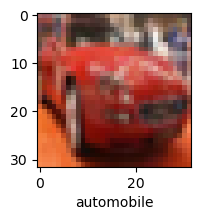

In [132]:
image_classification(X_train,y_train,5)

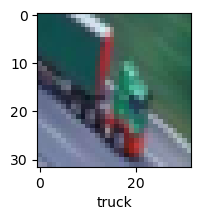

In [130]:
image_classification(X_train,y_train,50) 

In [95]:
#Normalizing our dataset
X_train = X_train/255.0
X_test = X_test/255.0

In [96]:
#Artificial Neural Network Model creation
ann = models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                        layers.Dense(300, activation = "relu"),
                        layers.Dense(100, activation = "relu"),
                        layers.Dense(10, activation = "softmax")])

#Model compilation
ann.compile(optimizer = "SGD",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

#Model training
ann.fit(X_train,y_train,epochs=5)  #Model building

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2783 - loss: 2.0006
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3901 - loss: 1.7155
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4235 - loss: 1.6215
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4469 - loss: 1.5724
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4613 - loss: 1.5204


In [97]:
from sklearn.metrics import confusion_matrix, classification_report

In [98]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("classification report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.57      0.45      0.50      1000
           1       0.30      0.89      0.45      1000
           2       0.41      0.13      0.20      1000
           3       0.42      0.11      0.18      1000
           4       0.35      0.45      0.40      1000
           5       0.45      0.25      0.32      1000
           6       0.58      0.32      0.41      1000
           7       0.38      0.62      0.47      1000
           8       0.51      0.59      0.54      1000
           9       0.54      0.24      0.33      1000

    accuracy                           0.41     10000
   macro avg       0.45      0.41      0.38     10000
weighted avg       0.45      0.41      0.38     10000



In [111]:
import seaborn as sns

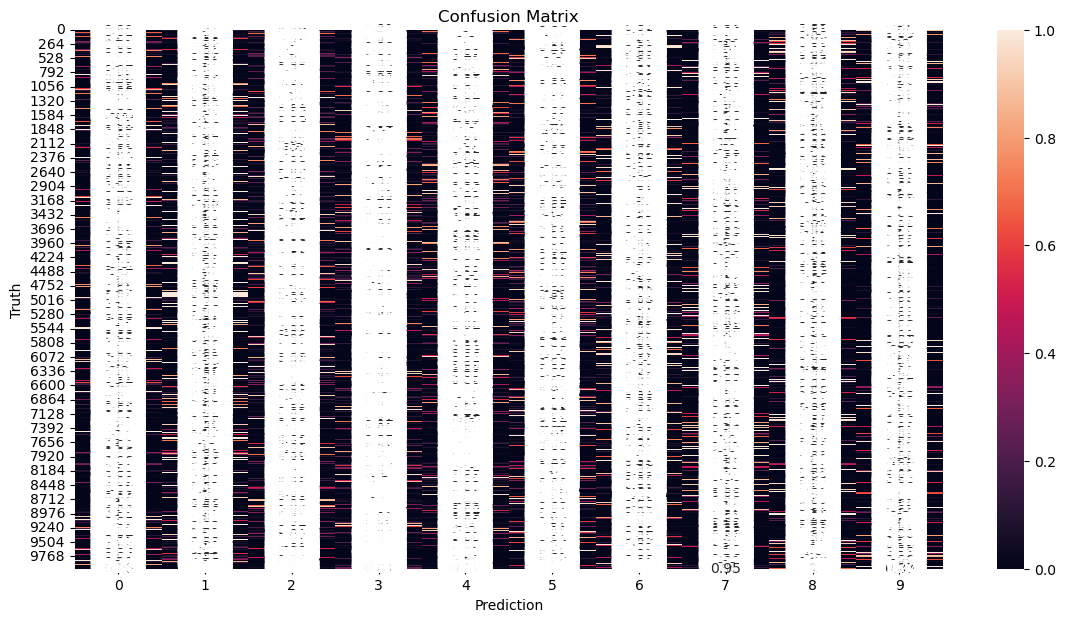

In [112]:
plt.figure(figsize=(14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel("Truth")
plt.xlabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

In [113]:
#Model Creation with CNN
cnn = models.Sequential([
                       layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
                       layers.MaxPooling2D((2,2)),
                      
                       layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
                       layers.MaxPooling2D((2,2)),
                       
                       layers.Flatten(),
                       layers.Dense(64, activation="relu"),
                       layers.Dense(10, activation="softmax")
                      ])

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [114]:
cnn.compile(optimizer="Adam", 
            loss = "sparse_categorical_crossentropy", 
            metrics = ["accuracy"])

In [115]:
#Model training
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.3756 - loss: 1.7060
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5983 - loss: 1.1472
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6525 - loss: 0.9926
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6827 - loss: 0.9081
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7163 - loss: 0.8210
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7279 - loss: 0.7814
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7532 - loss: 0.7064
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7641 - loss: 0.6717
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7782 - loss: 0.6301
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.7883 - loss: 0.5993


In [116]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7093 - loss: 0.9201


[0.9232169985771179, 0.7038000226020813]

In [117]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [118]:
y_pred[:5]

array([[3.1352267e-04, 2.8796519e-05, 8.9162972e-04, 9.5146549e-01,
        1.1861868e-03, 3.4965858e-02, 5.9112241e-03, 4.3313147e-04,
        4.7372147e-03, 6.6933986e-05],
       [2.4593086e-04, 1.0571016e-03, 1.9891525e-06, 1.1916474e-06,
        8.2779138e-08, 2.1749555e-09, 1.9570241e-09, 1.7822376e-09,
        9.9845719e-01, 2.3644198e-04],
       [2.1565360e-01, 1.0317321e-01, 2.4286538e-02, 5.4357924e-02,
        7.0160185e-03, 1.7535456e-03, 1.2729989e-03, 6.8719196e-03,
        5.3666431e-01, 4.8949908e-02],
       [8.0964732e-01, 1.3541083e-03, 8.4917657e-02, 6.7527278e-04,
        6.2988321e-03, 4.5940433e-06, 1.3206707e-05, 1.4117427e-06,
        9.7079247e-02, 8.4032736e-06],
       [7.5457609e-07, 6.4418800e-06, 7.7211121e-03, 1.0801489e-01,
        2.9083803e-01, 9.4346851e-03, 5.8376282e-01, 1.8258017e-04,
        3.8396640e-05, 2.7413142e-07]], dtype=float32)

In [119]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [120]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

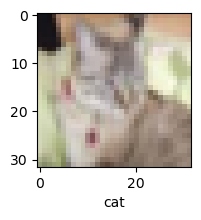

In [121]:
#Image prediction
image_classification(X_test, y_test, 8)

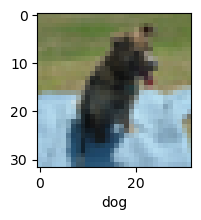

In [122]:
image_classification(X_test, y_test, 550)

In [126]:
#Predicting the classes
classes[y_classes[550]]

'dog'

In [127]:
classes[y_classes[8]]

'cat'